Se alcanzó la convergencia después de 11 iteraciones.
El valor de r1 es: 12.208581323757976


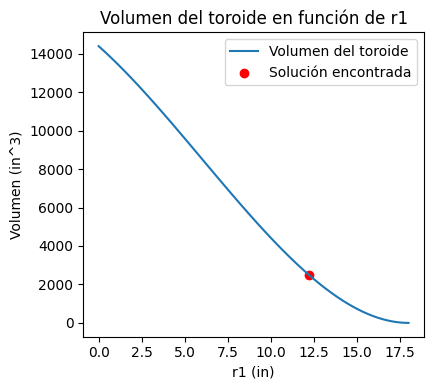

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def volumen_toroide(r1, r2):
    return (1/4) * (np.pi**2) * (r1 + r2) * (r2 - r1)**2

def derivada_volumen_toroide(r1, r2):
    return (1/2) * (np.pi**2) * (r1 + r2) * (r1 - r2)

def newton_raphson(volumen_deseado, r2, tolerancia=1e-6, max_iter=100):
    r1 = r2 / 2  # Asumir un valor inicial para r1

    for i in range(max_iter):
        volumen_actual = volumen_toroide(r1, r2)
        derivada_actual = derivada_volumen_toroide(r1, r2)

        if abs(volumen_actual - volumen_deseado) < tolerancia:
            print(f"Se alcanzó la convergencia después de {i+1} iteraciones.")
            return r1

        r1 = r1 - (volumen_actual - volumen_deseado) / derivada_actual

    print("El método de Newton-Raphson no convergió después de", max_iter, "iteraciones.")
    return None

# Parámetros dados en el problema
volumen_deseado = 2500  # in^3
r2 = 18  # in

# Calcular r1 usando el método de Newton-Raphson
resultado = newton_raphson(volumen_deseado, r2)

# Imprimir resultado
if resultado is not None:
    print("El valor de r1 es:", resultado)
else:
    print("No se pudo encontrar una solución con el método de Newton-Raphson.")

# Graficar la función de volumen en función de r1
r1_values = np.linspace(0, r2, 100)
volumen_values = volumen_toroide(r1_values, r2)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(r1_values, volumen_values, label='Volumen del toroide')
plt.scatter([resultado], [volumen_deseado], color='red', label='Solución encontrada')
plt.title('Volumen del toroide en función de r1')
plt.xlabel('r1 (in)')
plt.ylabel('Volumen (in^3)')
plt.legend()

plt.tight_layout()
plt.show()
